# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

This notebook will be mainly used for the capstone project of course Applied Data Science Capstone.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to find optimal locations somewhere in Europe for a company that has a small running business and want to expand.

Criteria for new locations:

- must be most populous European cities
- the cities that are not far from the actual company's location
- the cities that offer the best environment for small businesses including real estate prospects, third-party incentives and support

We will use our data science powers to find a few most promising cities sitting in Europe based on the mentioned criteria. Advantages of each city will then be clearly expressed so that the best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Input parameters for search are:
* actual company's address
* how far can be the cities from the actual company's location 

Based on the definition of our problem, the factors that will influence our decision are:
* distance of European cities from the actual company's location
* environment for small businesses that European cities offered
* list of three the most popular categories of the venue of the city

Following data sources will be needed to extract/generate the required information:
* centers of European cities will be obtained using **Small Business Index 2019** (https://sumup.co.uk/small-business-index-2019/)
* European cities that offer the best environment (**Score**) will be obtained using **Small Business Index 2019** (https://sumup.co.uk/small-business-index-2019/)
* list of X the most popular categories of the venue of the city will be obtained using **Foursquare API** (https://developer.foursquare.com/)

### Small Business Index 2019
**The SumUp Small Business Index** reveals the European cities that offer the best environment for enterprise. The Index reveals the status quo of small businesses across Europe’s most populous cities, including real estate prospects, and third-party incentives and support.

**City List** includes 100 cities across Europe selected based on biggest population size, including all the capital cities in Europe, regardless of membership of the European Union.

- **Population:** Urban population, sourced from United Nations Statistics Division, with most recent data for each city.

- **Size:** Urban size (km²), sourced from United Nations Statistics Division, University Websites and Wikipedia

They have analysed four major **categories** which contribute to providing a comprehensive overview of Small Business in Europe, thus dividing the Small Business Index 2019 into:
- **Small Businesses** - the type and total number of small businesses per city
- **Density** - the number of small businesses per capita and km²
- **Rent and Real Estate** - the retail area provision and the cost of rent
- **External Support** - financial measures and subsidies supporting small businesses

Each category is broken down into sub-factors:
- For Small Businesses, the following criteria were researched:
  - 🛍 Shops: Total number of shops per city. Source: OpenStreetMaps.

  - ☕ Cafe/Bar: Total number of cafes and bars per city, calculated as an average from 3 different sources: OpenStreetMaps, Yelp, and TripAdvisor.

  - 🍴 Restaurant: Total number of restaurants per city, calculated as the average from 3 different sources: OpenStreetMaps, Yelp, and TripAdvisor.

  - 💼 Handyman: Total number of handyman businesses per city, calculated as an average from 2 different sources: OpenStreetMaps and Yelp. This category includes: electricians, plumbers, locksmiths, carpenters, and painters.

  - 💅 Beauty: Total number of beauty-related businesses per city, calculated as an average from 2 different sources: OpenStreetMaps and Yelp. This category includes: cosmetic shops, hairdressers, massage salons, nail salons, and tattoo studios.

  - 🚖Taxi: Total number of taxis per country. The data was obtained from a European Commission 2016 report: “Study on passenger transport by taxi, hire car with driver and ridesharing in the EU”. For cities not included in this report, manual research was undergone with data retrieved from government websites and news articles.
 
- For Density, the following criteria were researched:
  - 👪Per Capita: The number of small businesses per inhabitant. A percentage was calculated between the number of small businesses and the population of the city. Population data was obtained from the last official census data.

  - 📍Per square km: The number of small businesses per km². Calculated based on Total Nr. of Small business and Urban Area.
- For Rent and Real Estate, the following criteria were researched:
  - 🔑Availability: The retail sales area provision per person, calculated as the retail area per country divided by the population. Source: KfK study on key retail indicators.

  - 💵Price: Monthly rent for an 85m² space, calculated as an average from 2 different sources: Expatistan and Numbeo.
- For External Support, the following criteria were researched:
  - 💰EU Subsidies: The amount granted to each country by the EU, as part of the EU COSME (Competitiveness of Enterprises and Small and Medium-sized Enterprises) program. Scored per capita.

  - ⚖Tax: The percentage of a company's income that must be paid to the government by law. Source: PWC tax summaries.

  - 🚀Initiatives: Total number of social media users per city identifying as “Small Business Owner” in addition to total number of social media users per city ‘interested’ in ‘start-up related topics’, e.g. Startup Outlets. Tracked using digital behavioural data measured as ‘interest’.

  - 📈Investment: Total venture capital from the state. The data was obtained in US dollars from 2017 and current conversion rates applied (US to Euro = 0.83). Source: Venture Investment Data Review. Scored per capita.


In order to rank the cities in an index, a score was attributed to each category, with the sum equaling in the total small business score. Once scores were obtained, the overall rank was calculated by weighting each criteria according to: Small Businesses (35%), Density (15%), Rent and Real Estate (35%), External Support (15%), therefore resulting in the overall score.

**Once the overall score was obtained, the scale was adjusted to standardise the results, resulting in a range from 1-10.**
This was achieved by ranking the final scores, assigning 0 to the lowest score, 10 to the highest, and the proportional part of the grades to the rest of the values.


### Foursquare API
The Places API offers real-time access to Foursquare’s global database of rich venue data and user content.

**Venue Recommendations** returns a list of recommended venues near the defined location and for each venue an array of **categories** that have been applied to this venue. One of the categories will have a primary field indicating that it is the primary category for the venue. For the complete category tree, see: https://developer.foursquare.com/docs/build-with-foursquare/categories/

For the complete the Places API documentation, see: https://developer.foursquare.com/docs/places-api/

--------------------------
Let's prepare Environment

In [7]:
import numpy as np
import pandas as pd # library for data analsysis
import urllib.request # import the library we use to open URLs
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#from sklearn.cluster import KMeans # import k-means from clustering stage

from sklearn import cluster as clusterAlg # import k-means from clustering stage

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [8]:
!conda install -c conda-forge bs4 --yes
from bs4 import BeautifulSoup # import the BeautifulSoup library so we can parse HTML and XML documents

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [9]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [10]:
!conda install -c conda-forge folium>=0.10.1 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [11]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


---------------------------------------
### Get European cities and their Score

Let's first obtain European cities that offer the best environment using Small Business Index 2019 (https://sumup.co.uk/small-business-index-2019/).

In [6]:
# specify which URL/web page we are going to be scraping
url = "https://sumup.co.uk/small-business-index-2019/?prc=3GP129GBP"

In [7]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [8]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, 'html.parser')

In [9]:
# right_table
right_table=soup.find('table', class_='display tk-table')

Information about Subsidies or Initiatives is not available for each city. In these situations, value 0 will be used.

In [10]:
# get data from table
A=[]; B=[]; C=[]; D=[]; E=[]; F=[]; G=[]; H=[]; CH=[]; I=[]; J=[]; K=[]; L=[]; M=[]; N=[]; O=[]; P=[]; Q=[]; R=[]; S=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')

    if len(cells)==20:
        A.append(cells[0].find(text=True).replace("\n", ""))
        B.append(cells[1].find(text=True).replace("\n", ""))
        C.append(cells[2].find(text=True).replace("\n", ""))
        D.append(cells[3].find(text=True).replace("\n", ""))
        E.append(cells[4].find(text=True).replace("\n", ""))
        F.append(float(cells[5].find(text=True).replace("\n", "")))
        G.append(float(cells[6].find(text=True).replace("\n", "")))
        H.append(float(cells[7].find(text=True).replace("\n", "")))
        CH.append(float(cells[8].find(text=True).replace("\n", "")))
        I.append(float(cells[9].find(text=True).replace("\n", "")))
        J.append(float(cells[10].find(text=True).replace("\n", "")))
        K.append(float(cells[11].find(text=True).replace("\n", "")))
        L.append(float(cells[12].find(text=True).replace("\n", "")))
        M.append(float(cells[13].find(text=True).replace("\n", "")))
        N.append(float(cells[14].find(text=True).replace("\n", "")))
        if cells[15].find(text=True).replace("\n", "") == '-':
            O.append(float(0))
        else:
            O.append(float(cells[15].find(text=True).replace("\n", "")))
        P.append(float(cells[16].find(text=True).replace("\n", "")))
        
        if cells[17].find(text=True).replace("\n", "") == '-':
            Q.append(float(0))
        else:
            Q.append(float(cells[17].find(text=True).replace("\n", "")))
        R.append(float(cells[18].find(text=True).replace("\n", "")))
        S.append(float(cells[19].find(text=True).replace("\n", "")))

In [11]:
# create dataframe:
df=pd.DataFrame(A,columns=['Id'])
df['City']=B
df['Country']=C
df['Size']=D
df['Population']=E

#Small Business
df['Shops']=F
df['Cafe & Bars']=G
df['Restaurant']=H
df['Tradesperson']=CH
df['Beauty']=I
df['Taxi']=J
#Density
df['Per Capita']=K
df['Per km²']=L
#Rent & Real estate
df['Availability']=M
df['Price']=N
#Government Support
df['Subsidies']=O
df['Corporate tax']=P
df['Initiatives']=Q
df['Investments']=R

df['Score']=S

df['Latitude']=np.nan
df['Longitude']=np.nan

df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,Per km²,Availability,Price,Subsidies,Corporate tax,Initiatives,Investments,Score,Latitude,Longitude
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,9.27,7.09,7.09,9.16,5.18,5.08,5.05,10.00,NaN,NaN
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,8.91,9.73,3.00,9.16,5.18,8.98,5.05,9.91,NaN,NaN
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,7.82,9.64,3.36,9.25,5.18,9.35,3.18,9.82,NaN,NaN
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,6.27,9.82,3.18,6.63,3.18,9.72,6.93,9.73,NaN,NaN
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,9.64,8.91,2.82,9.16,5.18,8.42,5.05,9.64,NaN,NaN


Looking good. So now we have all the European cities and their **Score** and other criteria. 

...and let's now save/persist this data into local file.

In [12]:
df.to_pickle('./df_score.pkl')

Let's get the **latitude** and the **longitude** coordinates of each city by values **City** name **Country**.

In [13]:
# get the latitude and the longitude coordinates of each city
geolocator = Nominatim(user_agent="foursquare_agent")

for i in df.index:
    df['City'].values[i]
    address = df['City'].values[i] + ', ' + df['Country'].values[i]
    #print(address)
    
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    df['Latitude'].values[i] = latitude
    df['Longitude'].values[i] = longitude 
    
df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,Per km²,Availability,Price,Subsidies,Corporate tax,Initiatives,Investments,Score,Latitude,Longitude
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,9.27,7.09,7.09,9.16,5.18,5.08,5.05,10.00,39.469901,-0.375951
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,8.91,9.73,3.00,9.16,5.18,8.98,5.05,9.91,40.416705,-3.703582
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,7.82,9.64,3.36,9.25,5.18,9.35,3.18,9.82,48.208354,16.372504
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,6.27,9.82,3.18,6.63,3.18,9.72,6.93,9.73,52.517037,13.388860
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,9.64,8.91,2.82,9.16,5.18,8.42,5.05,9.64,41.382894,2.177432


Looking good. So now we have all the European cities and their **Latitude**,**Longitude**.

...and let's now save/persist this data into local file.

In [14]:
df.to_pickle('./df_score_location.pkl')
df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,Per km²,Availability,Price,Subsidies,Corporate tax,Initiatives,Investments,Score,Latitude,Longitude
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,9.27,7.09,7.09,9.16,5.18,5.08,5.05,10.00,39.469901,-0.375951
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,8.91,9.73,3.00,9.16,5.18,8.98,5.05,9.91,40.416705,-3.703582
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,7.82,9.64,3.36,9.25,5.18,9.35,3.18,9.82,48.208354,16.372504
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,6.27,9.82,3.18,6.63,3.18,9.72,6.93,9.73,52.517037,13.388860
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,9.64,8.91,2.82,9.16,5.18,8.42,5.05,9.64,41.382894,2.177432


Let's visualize the data we have so far: European cities. 

For map initialization, it is necessary to find the center of Europe.

In [15]:
# get latitude and longitude values for center of Europe
address = 'Europe'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude values for center of Europe are: ' + str(latitude) + ' and ' + str(longitude))

Latitude and longitude values for center of Europe are: 51.0 and 10.0


In [16]:
# create map using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=5)

folium.Marker(
    location=[latitude, longitude],
    #popup='<i>' + address + '</i>',
    tooltip='<i>' + address + '</i>',
    icon=folium.Icon(color='black')
).add_to(map)

# add markers to map
for lat, lng, city, country in zip(df['Latitude'], df['Longitude'], df['City'], df['Country']):
    label = '{}, {}'.format(city, country)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

Looking good.

### Get an array of categories for each city

Now that we have our location candidates, let's use Foursquare API to get info on popular categories. In each city via a venues of each city (top X venues that are in a city a radius of Y meters) find a top Z **categories** (from data source *Foursquare API*) that have been applied to the venues in a city.

Foursquare credentials are defined in cell bellow.

In [17]:
# Define Foursquare Credentials and Version
CLIENT_ID = '2CDSFGBULKG2KSWC5L0B11FLXBYDYQC4P2IFABCBUCPT1PGS' # your Foursquare ID
CLIENT_SECRET = 'IIDKAGCY43HKTF55G05I232WCLJZUVYESWMK2JBGUYPEQUL5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2CDSFGBULKG2KSWC5L0B11FLXBYDYQC4P2IFABCBUCPT1PGS
CLIENT_SECRET:IIDKAGCY43HKTF55G05I232WCLJZUVYESWMK2JBGUYPEQUL5


In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
#function to repeat the same process to all the city in Europe
def getNearbyVenues(names, latitudes, longitudes, radius=750, limit = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit)
        
        #print(url)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Let's explore the cities in Europe. We will limit our analysis to area **~3km** around the city centre and a maximum of **100** venues, so we define parameters **radius** and **limit** for search.

In [20]:
europe_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                   radius=3000,
                                   limit=100                      
                                  )

In [21]:
#Let's check the size of the resulting dataframe
print(europe_venues.shape)
europe_venues.head()

(9539, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Valencia,39.469901,-0.375951,Plaça de l'Ajuntament,39.470154,-0.376323,Plaza
1,Valencia,39.469901,-0.375951,One Shot Palacio Reina Victoria 04,39.470257,-0.375001,Hotel
2,Valencia,39.469901,-0.375951,Louis Vuitton,39.472145,-0.374174,Boutique
3,Valencia,39.469901,-0.375951,La Petite Planèthé | Tienda de Té y Café a gra...,39.472808,-0.376878,Gourmet Shop
4,Valencia,39.469901,-0.375951,Palau del Marqués de Dos Aigües,39.472799,-0.374507,Museum


In [22]:
#Let's check how many venues were returned for each city
d = europe_venues.groupby('City').count()
d.head()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Alicante,100,100,100,100,100,100
Amsterdam,100,100,100,100,100,100
Antwerp,100,100,100,100,100,100
Athens,100,100,100,100,100,100
Barcelona,100,100,100,100,100,100


In [23]:
#Let's prepare data for visual representation
d['City'] = d.index
d.index = [x for x in range(1, len(d.values)+1)]
d.head()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,City
1,100,100,100,100,100,100,Alicante
2,100,100,100,100,100,100,Amsterdam
3,100,100,100,100,100,100,Antwerp
4,100,100,100,100,100,100,Athens
5,100,100,100,100,100,100,Barcelona


[]

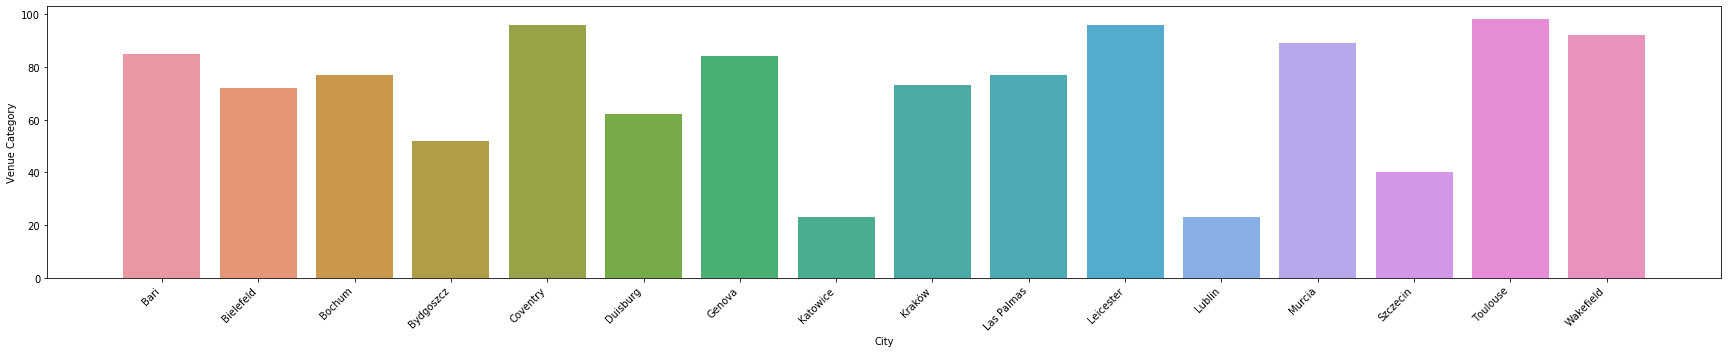

In [24]:
# create bar plot for quick check the cities where a number of venues is less than 100.
plt.figure(figsize=(30,5))
chart = sns.barplot(x="City", y="Venue Category", data=d[d['Venue Category'] < 100])

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.plot()

By the result of experiments, it seems that the API returns maximum **100** venues and number of venues depends on the search area (parameter **radius**).

In [25]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(europe_venues['Venue Category'].unique())))

There are 422 uniques categories.


Let's visualize the most popular categories in a wordcloud.

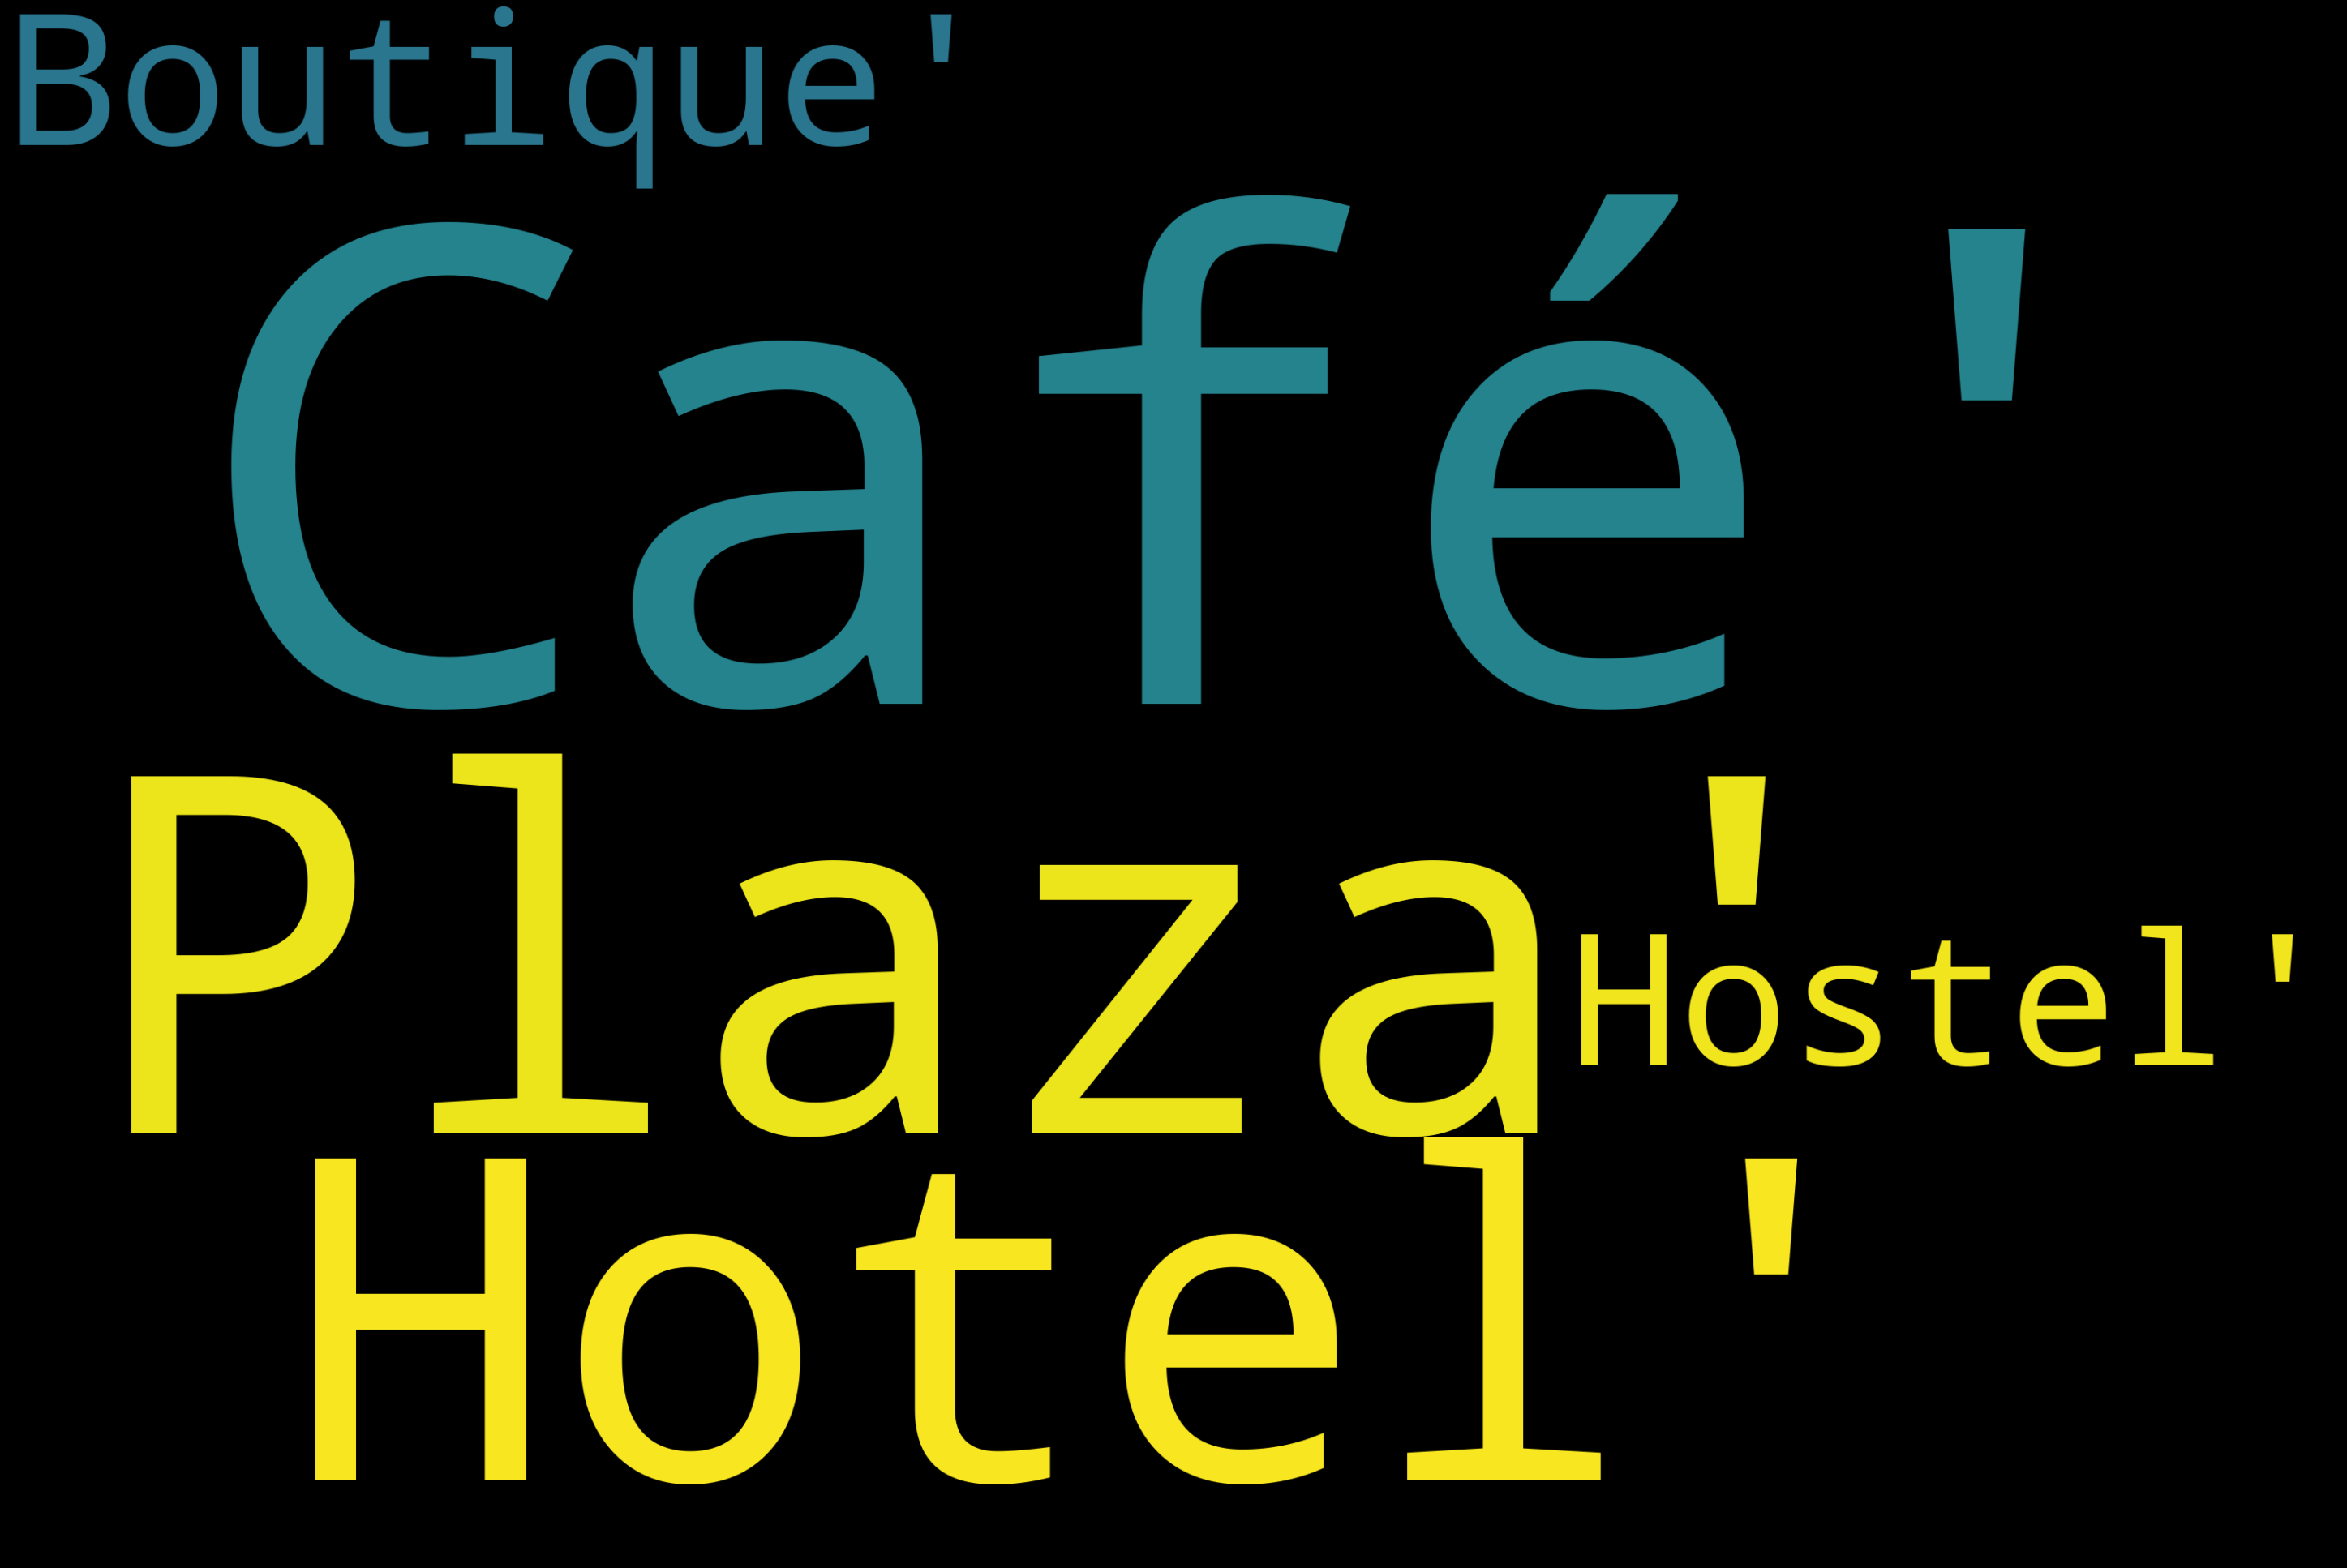

In [26]:
text = europe_venues['Venue Category'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The most popular category is **Plaza**.

Let's analyze each city

In [27]:
# one hot encoding
europe_onehot = pd.get_dummies(europe_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
europe_onehot['City'] = europe_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [europe_onehot.columns[-1]] + list(europe_onehot.columns[:-1])
europe_onehot = europe_onehot[fixed_columns]

europe_onehot.head()

,City,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Apple Wine Pub,Aquarium,Arcade,Argentinian Restaurant,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Valencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Valencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Valencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Valencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Valencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
europe_onehot.shape

(9539, 423)

In [29]:
#Next, let's group rows by city name and by taking the mean of the frequency of occurrence of each category
europe_grouped = europe_onehot.groupby('City').mean().reset_index()
europe_grouped

,City,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Apple Wine Pub,Aquarium,Arcade,Argentinian Restaurant,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Alicante,0.0,0.0,0.0,0.0,0.01000,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.0
1,Amsterdam,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.01,0.00,...,0.0,0.00,0.00,0.02,0.00,0.0,0.0,0.03,0.01,0.0
2,Antwerp,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.00,...,0.0,0.01,0.00,0.01,0.00,0.0,0.0,0.00,0.00,0.0
3,Athens,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.00,...,0.0,0.00,0.02,0.02,0.02,0.0,0.0,0.00,0.00,0.0
4,Barcelona,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.01,...,0.0,0.00,0.00,0.01,0.02,0.0,0.0,0.01,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vilnius,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.00,...,0.0,0.01,0.01,0.01,0.01,0.0,0.0,0.00,0.00,0.0
96,Wakefield,0.0,0.0,0.0,0.0,0.01087,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
97,Warsaw,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.01,0.00,0.0
98,Zurich,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00,0.00,...,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [30]:
#Let's confirm the new size
europe_grouped.shape

(100, 423)

Let's put that into a *pandas* dataframe

In [31]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = europe_grouped['City']

for ind in np.arange(europe_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(europe_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(100)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alicante,Tapas Restaurant,Spanish Restaurant,Restaurant,Plaza,Coffee Shop,Mediterranean Restaurant,Ice Cream Shop,Bookstore,Pizza Place,Italian Restaurant
1,Amsterdam,Coffee Shop,Hotel,Bar,Pizza Place,Café,Restaurant,Plaza,Canal,Cocktail Bar,Bakery
2,Antwerp,Coffee Shop,Cocktail Bar,Spanish Restaurant,Restaurant,Bookstore,Bar,Bakery,French Restaurant,Plaza,Italian Restaurant
3,Athens,Historic Site,Café,Dessert Shop,Boutique,Bar,Coffee Shop,Theater,Plaza,Meze Restaurant,Gourmet Shop
4,Barcelona,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza
...,...,...,...,...,...,...,...,...,...,...,...
95,Vilnius,Coffee Shop,Café,Park,Italian Restaurant,Scenic Lookout,Bakery,Gym,Gym / Fitness Center,Pizza Place,Museum
96,Wakefield,Coffee Shop,Pub,Clothing Store,Grocery Store,Fast Food Restaurant,Café,Pizza Place,Hotel,Furniture / Home Store,Bar
97,Warsaw,Café,Ice Cream Shop,Italian Restaurant,Restaurant,Park,Coffee Shop,Sushi Restaurant,Beach,Polish Restaurant,Bar
98,Zurich,Hotel,Café,Bar,Plaza,Swiss Restaurant,Bakery,Vegetarian / Vegan Restaurant,Coffee Shop,Gym / Fitness Center,Cocktail Bar


Let's add to dataframe the top 10 categoriess for each city.

In [33]:
df =  pd.merge(df, neighborhoods_venues_sorted, on='City')
df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,Plaza,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,Plaza,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,Plaza,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,Coffee Shop,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza


...and let's now save/persist this data into local file.

In [34]:
df.to_pickle('./df_score_location_category.pkl')

In [35]:
df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,Plaza,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,Plaza,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,Plaza,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,Coffee Shop,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza


Looking good. So now we have all the European cities their **Score**, their **location coordinates** and their Top 10 popular **categories**.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new expansion!

## Methodology <a name="methodology"></a>

In first step we have collected the required data: we have all the European cities their **Score**, their **location coordinates** and their Top 10 popular **categories**.

Next steps step in our analysis will be:
1. For defined company's **address** find appropriate location coordinators (latitude, longitude).
2. Calculate **distance** between each European city and the actual company's location.
3. Classify cities via **score** and **distance** to appropriate count of clusters.
4. As an output, we will present the map of all cities with a list of its top three categories but also create clusters (using **MiniBatchKMeans** clustering algorithm) of those cities to identify the best city or group of cities for company expansion.

## Analysis <a name="analysis"></a>

In [258]:
df = pd.read_pickle("./df_score_location_category.pkl")

In [259]:
# delete outliers
#Nicosia, Cyprus
#Las Palmas, Spain
#df.drop( df[ df['City'] == 'Nicosia' ].index , inplace=True)
#df.drop( df[ df['City'] == 'Las Palmas' ].index , inplace=True)
#df.reset_index(drop=True)
df.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,Plaza,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,Plaza,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,Plaza,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,Coffee Shop,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza


Let's find location coordinators for defined company address.

In [286]:
# define company address

address = 'Košice, Slovakia'
address = 'Paris, France'
address = 'Las Palmas, Spain'
address = 'Jesenice u Prahy, Czech Republic'
address = 'Praha, Czech Republic'
address = 'Budapest, Hungary'
#address = 'Leicester, UK'
radius = 500 * 1000 # in KM
score_treshold = 7

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Location coordinators for company address: {} are: {}, {}'.format(address, latitude, longitude))

Location coordinators for company address: Budapest, Hungary are: 47.4983815, 19.0404707


In [287]:
# prepare data structure for the distance calculation
distances = df.loc[:,['City','Latitude', 'Longitude']] 
distances['LatitudeSource']=latitude
distances['LongitudeSource']=longitude
distances['AddressSource']=address
distances['Distance']=np.nan

distances.tail()

,City,Latitude,Longitude,LatitudeSource,LongitudeSource,AddressSource,Distance
95,Bari,41.125784,16.862029,47.498382,19.040471,"Budapest, Hungary",NaN
96,Luxembourg City,49.611277,6.129799,47.498382,19.040471,"Budapest, Hungary",NaN
97,Bonn,50.735851,7.100660,47.498382,19.040471,"Budapest, Hungary",NaN
98,Brno,49.192244,16.611338,47.498382,19.040471,"Budapest, Hungary",NaN
99,Valletta,35.898982,14.513676,47.498382,19.040471,"Budapest, Hungary",NaN


So now we calculate the **distance** between each European city and the actual company's location.

In [288]:
from geopy import distance
 
for i in distances.index:
    source = (distances['LatitudeSource'].values[i], distances['LongitudeSource'].values[i])
    target = (distances['Latitude'].values[i], distances['Longitude'].values[i])
    
    distances['Distance'].values[i] = distance.distance(source, target).km
    
distances.head()

,City,Latitude,Longitude,LatitudeSource,LongitudeSource,AddressSource,Distance
0,Valencia,39.469901,-0.375951,47.498382,19.040471,"Budapest, Hungary",1799.078688
1,Madrid,40.416705,-3.703582,47.498382,19.040471,"Budapest, Hungary",1978.468748
2,Vienna,48.208354,16.372504,47.498382,19.040471,"Budapest, Hungary",214.685559
3,Berlin,52.517037,13.388860,47.498382,19.040471,"Budapest, Hungary",689.282369
4,Barcelona,41.382894,2.177432,47.498382,19.040471,"Budapest, Hungary",1500.323189


Let's add to dataframe the **distance** between each European city and the actual company's location.

In [289]:
if 'Distance' in df.columns:
    df.drop('Distance', axis='columns', inplace=True)

df.insert(0, 'Distance', distances.Distance, allow_duplicates = False)
df.head()

,Distance,Cluster Labels,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Color
0,1799.078688,3,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,...,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant,#00802b
1,1978.468748,3,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,...,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop,#00802b
2,214.685559,3,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,...,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café,#00802b
3,689.282369,3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,...,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery,#00802b
4,1500.323189,3,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,...,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza,#00802b


Looking good. So now we have the **distance** between each European city and the actual company's location.

...and let's now save/persist this data into local file.

In [290]:
df.to_pickle('./df_score_location_category_distance.pkl')

Now we classify cities via **score** and **distance** to appropriate count of clusters.

In [291]:
distance_test= df[['Score', 'Distance']]
distance_test.head()

,Score,Distance
0,10.00,1799.078688
1,9.91,1978.468748
2,9.82,214.685559
3,9.73,689.282369
4,9.64,1500.323189


Now we have normalized **score** and **distance** for clustering.

In [292]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(distance_test)
distance_test = mms.transform(distance_test)

Use Elbow method for optimal **k** for **MiniBatchKMeans** clustering algorithm.

In [293]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    #km = clusterAlg.KMeans(n_clusters=k)
    km = clusterAlg.MiniBatchKMeans(n_clusters=k, random_state=0)
    km = km.fit(distance_test)
    Sum_of_squared_distances.append(km.inertia_)

Let's visualize the Elbow Method For Optimal **k**.

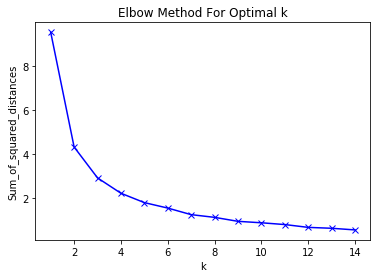

In [294]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Let's classify cities via **score** and **distance** to an appropriate count of clusters using **MiniBatchKMeans** clustering algorithm.

In [295]:
# run clustering
n_clusters=4

clusters = clusterAlg.MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(distance_test) # ... od 4 je to OK
#clusters = clusterAlg.SpectralClustering(n_clusters=n_clusters).fit(distance_test) # ... od 5 je to OK
#clusters = clusterAlg.AgglomerativeClustering(n_clusters=n_clusters).fit(distance_test) # ... od 7 je to OK
#clusters = clusterAlg.Birch(threshold=0.01, n_clusters=n_clusters).fit(distance_test) # ... od 7 je to OK
#clusters = clusterAlg.KMeans(n_clusters=n_clusters, random_state=0).fit(distance_test) # ... od 8 je to OK

#clusters = clusterAlg.AffinityPropagation(damping=0.5).fit(distance_test) # ... dává 9 a to je moc
#clusters = clusterAlg.DBSCAN(min_samples=5).fit(distance_test) # ... dá to 6 clusters nepoužitelný, špatné proložení
#clusters = clusterAlg.MeanShift().fit(distance_test) # dá to 2 clusters a to není OK

# check cluster labels generated for each row in the dataframe
clusters.labels_[0:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's add to dataframe the **claster** for each city.

In [296]:
selected_clusters = clusters

if 'Cluster Labels' in df.columns:
    df.drop('Cluster Labels', axis='columns', inplace=True)

df.insert(0, 'Cluster Labels', selected_clusters.labels_, allow_duplicates = False)
df.head() # check the last columns!

,Cluster Labels,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Color
0,3,1799.078688,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,...,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant,#00802b
1,3,1978.468748,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,...,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop,#00802b
2,3,214.685559,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,...,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café,#00802b
3,3,689.282369,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,...,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery,#00802b
4,3,1500.323189,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,...,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza,#00802b


Check number of cities in each cluster.

In [297]:
n_by_cluster = df.groupby('Cluster Labels')['Cluster Labels'].count()
n_by_cluster.head(10)

Cluster Labels
0    21
1    29
2    20
3    30
Name: Cluster Labels, dtype: int64

Check number of clusters

In [298]:
n_clusters = df['Cluster Labels'].unique().size
print('Count of clusters: ', n_clusters)

Count of clusters:  4


Looking good.

Let's present the map of all cities with a list of its top three popular categories but also create clusters of those cities to identify the best city or group of cities for company expansion.

In [299]:
# sort cluster by Score or Distance 
def sort_clusters(df, sort_by='Score'):
    if sort_by == 'Score':
        df_temp = df.groupby('Cluster Labels')[[sort_by]].max().sort_values(by=[sort_by], ascending=True)
    if sort_by == 'Distance':
        df_temp = df.groupby('Cluster Labels')[[sort_by]].min().sort_values(by=[sort_by], ascending=False)
    
    sorted_cluster_list = list(df_temp.index.values) 
    return sorted_cluster_list

# get value from [] from X position
def custom_sort(t):
    return t[0]

#colors = ['#ff0000', '#ffff00', '#4dff4d', '#00802b']
#colors = ['#ff0000', '#ff9900', '#ffff00', '#00802b']
colors = ['#ff0000', '#ff9900', '#e6e600', '#00802b']

c_Score = sort_clusters(df, 'Score')
c_Distance = sort_clusters(df, 'Distance')

#print(c_Score)
#print(c_Distance)

relevance =[]
for i in c_Score: 
    relevance.append([(c_Score.index(i)*1.01) + (c_Distance.index(i)), i])
    
relevance.sort(key=custom_sort)
#print(relevance) 

c =[]
for i in relevance: 
    c.append([i[1]])
    
df['Color']=''
for i in df.index:
     
     index = c.index(df['Cluster Labels'].values[i])
     df['Color'].values[i] = colors[index]

In [300]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

folium.Marker(
    location=[latitude, longitude],
    tooltip=address,
    icon=folium.Icon(color='black')
).add_to(map_clusters)

folium.Circle(
    location=[latitude, longitude],
    radius=radius,
    tooltip= 'Radius: ' + str(int(radius/1000)) + ' Km',
    color='blue',
    ).add_to(map_clusters)


# add markers to the map
for lat, lon, country, city, cluster, score, distance, color in zip(df['Latitude'], df['Longitude'], df['Country'], df['City'], df['Cluster Labels'], df['Score'], df['Distance'], df['Color']):
    
    #Indicators
    df1 = df[df.City==city]
    df1 = df1[['Size', 'Population', 'Shops', 'Cafe & Bars','Restaurant', 'Tradesperson', 'Beauty', 'Taxi', 'Per Capita', 'Per km²','Availability', 'Price', 'Subsidies', 'Corporate tax', 'Initiatives', 'Investments']]
    df1 = df1.transpose()
    df1['City'] = df1.index
    df1.index = [x for x in range(1, len(df1.values)+1)]
    df1.columns = ["Value", "Characteristic"]

    indicators = df1[["Characteristic","Value"]].to_html(index=False)
    indicators = indicators.replace('<tr>', '<tr align="right">')
    
    #Common Venue
    df1 = df[df.City==city]
    df1 = df1[['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue', '7th Most Common Venue','8th Most Common Venue', '9th Most Common Venue','10th Most Common Venue']]
    df1 = df1.transpose()
    df1['City'] = df1.index
    df1.index = [x for x in range(1, len(df1.values)+1)]
    df1.columns = ["Category", "Indicator"]
    common_categories = df1[["Indicator","Category"]].to_html(index=False)
    
    label_text = """
    
        <h3>""" + str(city) + """, """ + str(country) + """</h3>
        
        """ + "({}, {})".format(lat, lon) + """<br><br>

        <table>
        <tbody>
        
        <tr valign="top">
        <td><b>Score:</b></td>
        <td style="width: 10px"></td>
        <td text-align: right><b>""" + str(score) + """</b></td>
        </tr>
        
        <tr valign="top">
        <td><b>Distance [Km]:</b></td>
        <td style="width: 10px"></td>
        <td text-align: right><b>""" + str(int(distance)) + """</b></td>
        </tr>
        
        </tbody>
        </table>  
        
        <br>
        
        <table>
        <tbody>
        <tr>
        <td text-align: top>Small Business Index</td>
        <td style="width: 10px"></td>
        <td text-align: top>Categories</td>
        </tr>
        
        <tr valign="top">
        <td valign="top">""" + indicators + """</td>
        <td></td>
        <td valign="top">""" + common_categories + """</td>
        </tr>
        
        <tr valign="down">
        <td valign="down">SumUp</td>
        <td></td>
        <td valign="down">Foursquare API</td>
        </tr>
        
        </tbody>
        </table>   
        """
    
        
    label = folium.Popup(label_text, max_width=450, parse_html=False)
    
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7).add_to(map_clusters)
      
map_clusters

Looking good.

Let's present scatter plot (parameters **Score** and **Distance**) the map of all cities but also create clusters of those cities to identify the best city or group of cities for company expansion.

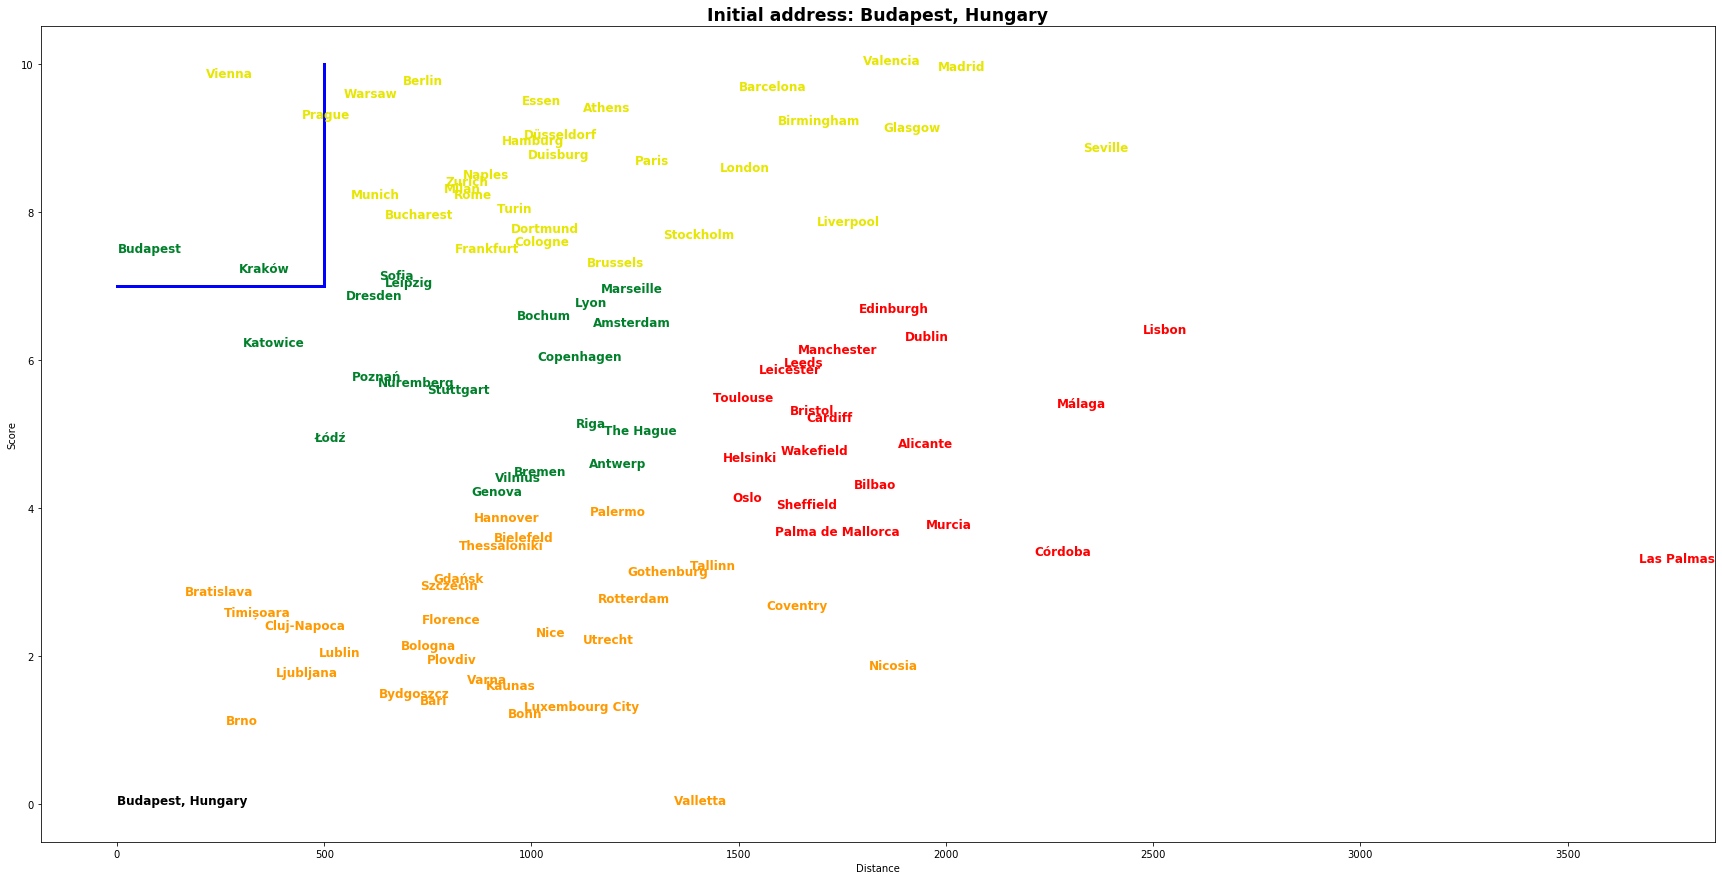

In [301]:
plt.figure(figsize=(30,15))
plt.title('Initial address: ' + address, size='xx-large', color='black', weight='semibold')
p1=sns.regplot(data=df, x="Distance", y="Score", color="w", fit_reg=False, marker="o")

p1.plot([radius/1000, radius/1000], [score_treshold, 10], linewidth=3, color="b")
p1.plot([0, radius/1000], [score_treshold, score_treshold], linewidth=3, color="b")
    
    
#plt.scatter(x=0, y=0, color='b')
p1.text(0+0.9, 0, address, horizontalalignment='left', size='large', color='#000000', weight='semibold')

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
    p1.text(df.Distance[line]+0.9, df.Score[line], df.City[line], horizontalalignment='left', size='large', color=df.Color[line], weight='semibold')

Looking good.

...and let's now save/persist this data into local file.

In [283]:
df.to_pickle('./data/city/df_score_location_category_distance_' + address + '.pkl')
df.to_csv('./data/city/df_score_location_category_distance_' + address + '.csv', index=False, encoding='utf-8', sep=';')

In [284]:
df.loc[df['Cluster Labels'] == 0, df.columns[[1] + list(range(2, df.shape[1]-1))]].head()

,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,515.188306,26,Dortmund,Germany,280,"586,181",9.09,3.73,6.18,7.45,...,Café,Park,Nightclub,Italian Restaurant,Bar,Mediterranean Restaurant,Turkish Restaurant,Burger Joint,Sushi Restaurant,Museum
27,537.381597,28,Cologne,Germany,"1,627","1,060,582",8.82,7.36,8.55,8.45,...,Italian Restaurant,Café,Pedestrian Plaza,Plaza,Park,Coffee Shop,Hotel,Cocktail Bar,Bakery,Sushi Restaurant
28,410.534503,29,Frankfurt,Germany,"2,538","2,587,904",8.45,7.73,8.82,7.82,...,Café,Park,Italian Restaurant,Plaza,Apple Wine Pub,Art Museum,Wine Bar,German Restaurant,Coffee Shop,Bar
29,444.922331,30,Budapest,Hungary,314,"732,688",9.18,6.00,8.27,3.55,...,Coffee Shop,Bakery,Hotel,Breakfast Spot,Park,Pizza Place,Ice Cream Shop,Indie Movie Theater,Dessert Shop,Theater
30,719.324065,31,Brussels,Belgium,"1,517","1,550,299",5.73,7.64,8.73,5.09,...,Bar,Hotel,Plaza,Concert Hall,Bookstore,Seafood Restaurant,Coffee Shop,Sandwich Place,Park,Boutique


In [285]:
df.loc[df['Cluster Labels'] == 1, df.columns[[1] + list(range(2, df.shape[1]-1))]].head()

,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,755.417356,65,Genova,Italy,244,"585,128",5.09,6.18,6.36,2.45,...,Italian Restaurant,Hotel,Plaza,Café,Historic Site,Trattoria/Osteria,Ice Cream Shop,Seafood Restaurant,Science Museum,Park
68,414.249315,69,Hannover,Germany,218,"259,749",5.91,4.36,5.64,6.27,...,Italian Restaurant,Café,Coffee Shop,Supermarket,Bakery,Bar,Plaza,Pizza Place,Park,Indian Restaurant
71,465.374173,72,Bielefeld,Germany,257,"333,090",5.55,1.82,2.27,4.64,...,Supermarket,Bar,Hotel,Italian Restaurant,Café,Bakery,Burger Joint,Middle Eastern Restaurant,Mediterranean Restaurant,Restaurant
75,1231.764598,76,Tallinn,Estonia,159,"426,538",2.27,2.55,2.64,1.82,...,Hotel,Restaurant,Café,Wine Bar,Scenic Lookout,Eastern European Restaurant,Coffee Shop,Park,Cocktail Bar,Theater
76,863.159325,77,Gothenburg,Sweden,204,"581,821",4.55,3.64,4.18,4.00,...,Coffee Shop,Pub,Hotel,Burger Joint,Scandinavian Restaurant,Bistro,Café,Bar,Vietnamese Restaurant,Italian Restaurant


In [247]:
df.loc[df['Cluster Labels'] == 2, df.columns[[1] + list(range(2, df.shape[1]-1))]].head()

,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,1358.071537,38,Edinburgh,Scotland,125,"482,005",7.55,7.91,5.91,4.82,...,Café,Park,Bar,Hotel,Coffee Shop,Cocktail Bar,Beer Bar,Pub,Sandwich Place,Pizza Place
40,2248.157750,41,Lisbon,Portugal,84,"504,718",4.73,9.45,9.18,9.45,...,Plaza,Hotel,Hostel,Wine Bar,Portuguese Restaurant,Scenic Lookout,Bar,Café,Restaurant,Vegetarian / Vegan Restaurant
41,1480.393528,42,Dublin,Ireland,318,"544,107",5.82,8.36,6.64,6.18,...,Coffee Shop,Pub,Café,Park,Plaza,Irish Pub,Theater,Ice Cream Shop,Indie Movie Theater,Historic Site
43,1219.063704,44,Manchester,UK,630,"256,984",6.27,8.73,6.55,8.91,...,Coffee Shop,Indian Restaurant,Pub,Café,Park,Hotel,Museum,Beer Bar,Tea Room,Supermarket
45,1182.030259,46,Leeds,UK,488,"474,632",6.82,8.18,4.82,7.73,...,Bar,Coffee Shop,Café,Pub,Indian Restaurant,Gym / Fitness Center,Beer Bar,Plaza,Food & Drink Shop,Music Venue


## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in Berlin (~2000 in our initial area of interest which was 12x12km around Alexanderplatz), there are pockets of low restaurant density fairly close to city center. Highest concentration of restaurants was detected north and west from Alexanderplatz, so we focused our attention to areas south, south-east and east, corresponding to boroughs Kreuzberg, Friedrichshain and south-east corner of central Mitte borough. Another borough was identified as potentially interesting (Prenzlauer Berg, north-east from Alexanderplatz), but our attention was focused on Kreuzberg and Friedrichshain which offer a combination of popularity among tourists, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low restaurant density.

After directing our attention to this more narrow area of interest (covering approx. 5x5km south-east from Alexanderplatz) we first created a dense grid of location candidates (spaced 100m appart); those locations were then filtered so that those with more than two restaurants in radius of 250m and those with an Italian restaurant closer than 400m were removed.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 15 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Italian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Berlin center but not crowded with existing restaurants (particularly Italian) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project is to identify optimal cities somewhere in Europe for a company that has a small running business and want to expand. In addition to its location, other useful information was obtained for each city. Clustering of those cities was performed in order to addresses of those cities that can be used as starting points for final exploration by stakeholders.

The final decision on the optimal city for new expansion will be made by stakeholders based on:
- **distance** from the actual company's location, 
- **score**,
- top popular venues **categories**,
- and other specific characteristics of the city like:
    - 🛍 Shops: Total number of shops per city

    - ☕ Cafe/Bar: Total number of cafes and bars per city

    - 🍴 Restaurant: Total number of restaurants per city

    - 💼 Handyman: Total number of handyman businesses per city

    - 💅 Beauty: Total number of beauty-related businesses per city

    - 🚖Taxi: Total number of taxis per country
    
    - 👪Per Capita: The number of small businesses per inhabitant

    - 📍Per square km: The number of small businesses per km²

    - 🔑Availability: The retail sales area provision per person

    - 💵Price: Monthly rent for an 85m² space

    - 💰EU Subsidies: The amount granted to each country by the EU,

    - ⚖Tax: The percentage of a company's income that must be paid to the government by law

    - 🚀Initiatives: Total number of social media users per city identifying as “Small Business Owner” in addition to total number of social media users per city ‘interested’ in ‘start-up related topics’

    - 📈Investment: Total venture capital from the state

# Get data for all cities

In [192]:
df_cities = pd.read_pickle("./df_score_location_category.pkl")
df_cities.head()

,Id,City,Country,Size,Population,Shops,Cafe & Bars,Restaurant,Tradesperson,Beauty,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Valencia,Spain,135,"792,055",3.00,9.36,9.00,6.45,8.00,...,Plaza,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant
1,2,Madrid,Spain,606,"3,198,645",9.64,9.91,9.82,9.27,9.64,...,Plaza,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop
2,3,Vienna,Austria,415,"1,867,582",9.27,9.18,9.27,8.36,9.09,...,Plaza,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café
3,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,9.73,9.55,9.82,...,Coffee Shop,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery
4,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,9.55,7.36,9.27,...,Hotel,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza


In [205]:
def get_city_data(cities, city, country):
    one_city = cities.copy()
    
    # get latitude, longitude of city
    geolocator = Nominatim(user_agent="foursquare_agent")
    
    address = "{}, {}".format(city, country)
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    # prepare data structure for the distance calculation
    distances = df.loc[:,['City','Latitude', 'Longitude']] 
    distances['LatitudeSource']=latitude
    distances['LongitudeSource']=longitude
    distances['AddressSource']=address
    distances['Distance']=np.nan
    
    for i in distances.index:
        target = (distances['Latitude'].values[i], distances['Longitude'].values[i])
        source = (distances['LatitudeSource'].values[i], distances['LongitudeSource'].values[i])
    
        distances['Distance'].values[i] = distance.distance(source, target).km
    
    if 'Distance' in one_city.columns:
        one_city.drop('Distance', columns == True)
        
    one_city.insert(0, 'Distance', distances.Distance, allow_duplicates = False)
    
    if 'AddressSource' in one_city.columns:
        one_city.drop('AddressSource', columns == True)
        
    one_city.insert(0, 'AddressSource', distances.AddressSource, allow_duplicates = False)
    
    distance_test= one_city[['Score', 'Distance']]
    
    mms = MinMaxScaler()
    mms.fit(distance_test)
    distance_test = mms.transform(distance_test)
    
    # run clustering
    n_clusters=4

    clusters = clusterAlg.MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(distance_test) # ... od 4 je to OK

    if 'Cluster Labels' in one_city.columns:
        one_city.drop('Cluster Labels', columns == True)
        
    one_city.insert(0, 'Cluster Labels', clusters.labels_, allow_duplicates = False)

    colors = ['#ff0000', '#ffff00', '#4dff4d', '#00802b']

    c_Score = sort_clusters(one_city, 'Score')
    c_Distance = sort_clusters(one_city, 'Distance')

    relevance =[]
    for i in c_Score: 
        relevance.append([(c_Score.index(i))*1.01 + c_Distance.index(i), i])
    
    relevance.sort(key=custom_sort)

    c =[]
    for i in relevance: 
        c.append([i[1]])
    
    one_city['Color']=''
    for i in one_city.index:
     
         index = c.index(one_city['Cluster Labels'].values[i])
         one_city['Color'].values[i] = colors[index]
    
    return one_city

In [221]:
for lat, lon, country, city in zip(df_cities['Latitude'], df_cities['Longitude'], df_cities['Country'], df_cities['City']):
    one_city = get_city_data(df_cities, city, country)
    df_all = df_all.append(one_city, ignore_index = True) 
    
#city.to_pickle('./data/city/df_score_location_category_distance_' + address + '.pkl')
df_all.to_csv('./data/city/df_score_location_category_distance_all' + '.csv', index=False, encoding='utf-8', sep=';', header=True)

In [220]:
one_city = get_city_data(df_cities, 'Praha', 'Czech Republic')
one_city.head()
#one_city.head().to_csv('./data/city/df_score_location_category_distance_all_header' + '.csv', index=False, encoding='utf-8', sep=';', mode='a', header=True)

,Cluster Labels,AddressSource,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Color
0,3,"Praha, Czech Republic",1656.655163,1,Valencia,Spain,135,"792,055",3.00,9.36,...,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant,#00802b
1,3,"Praha, Czech Republic",1775.231189,2,Madrid,Spain,606,"3,198,645",9.64,9.91,...,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop,#00802b
2,3,"Praha, Czech Republic",252.838323,3,Vienna,Austria,415,"1,867,582",9.27,9.18,...,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café,#00802b
3,3,"Praha, Czech Republic",279.716492,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,...,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery,#00802b
4,3,"Praha, Czech Republic",1354.656284,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,...,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza,#00802b


In [202]:
get_city_data(df_cities, 'Praha', 'Czech Republic').head()

,Cluster Labels,AddressSource,Distance,Id,City,Country,Size,Population,Shops,Cafe & Bars,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Color
0,3,"Praha, Czech Republic",1656.655163,1,Valencia,Spain,135,"792,055",3.00,9.36,...,Hotel,Park,Mediterranean Restaurant,Café,Italian Restaurant,Garden,Spanish Restaurant,Tapas Restaurant,Restaurant,#00802b
1,3,"Praha, Czech Republic",1775.231189,2,Madrid,Spain,606,"3,198,645",9.64,9.91,...,Tapas Restaurant,Restaurant,Hotel,Café,Bookstore,Spanish Restaurant,Hostel,Bar,Coffee Shop,#00802b
2,3,"Praha, Czech Republic",252.838323,3,Vienna,Austria,415,"1,867,582",9.27,9.18,...,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Concert Hall,Art Museum,Coffee Shop,Palace,Café,#00802b
3,3,"Praha, Czech Republic",279.716492,4,Berlin,Germany,"1,030","3,520,031",9.82,9.64,...,Bookstore,Hotel,Concert Hall,Plaza,Café,Monument / Landmark,Park,Italian Restaurant,Bakery,#00802b
4,3,"Praha, Czech Republic",1354.656284,5,Barcelona,Spain,101,"1,611,010",6.91,9.73,...,Spanish Restaurant,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Burger Joint,Dessert Shop,Bookstore,Pizza Place,Plaza,#00802b
